In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(application_df[['EIN', 'NAME']], axis=1, inplace = True)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Repeating optimization from base analysis
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Determine which values to replace if counts are less than ...? 200
replace_application = list(app_type_counts[app_type_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

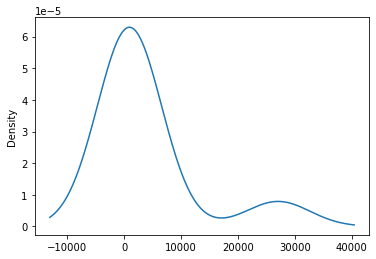

In [4]:
counts = application_df.APPLICATION_TYPE.value_counts()
counts.plot.density()

In [5]:
# Binning CLASSIFICATION
class_counts = application_df['CLASSIFICATION'].value_counts()

# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts<1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

# ASK_AMT looks suspicious

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Looking into ask_amt
ask_amt_counts_df = application_df['ASK_AMT'].value_counts().rename_axis('unique_values').reset_index(name='counts')
ask_amt_counts_df.head()

,unique_values,counts
0,5000,25398
1,10478,3
2,15583,3
3,63981,3
4,6725,3


<AxesSubplot:ylabel='Frequency'>

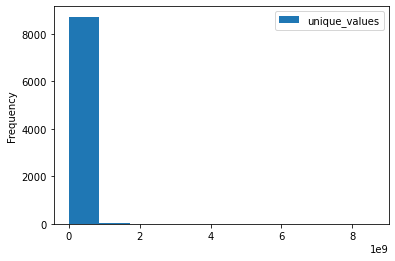

In [8]:
# Plotting the data... will decide to drop
ask_amt_counts_df.plot.hist(x='counts', y='unique_values')

In [9]:
# Drop ask_amt column
application_df.drop(columns=['ASK_AMT'], inplace=True)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL'],
      dtype='object')

In [10]:
# Looking into AFFILIATION column
aff_value_counts = application_df['AFFILIATION'].value_counts()
aff_value_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

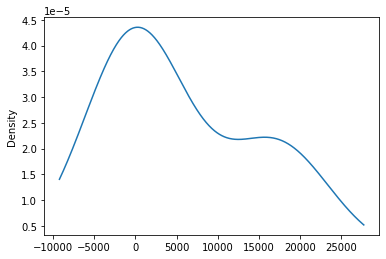

In [11]:
# Looks like it's fine as is
aff_value_counts.plot.density()

In [12]:
# Looking at use case... looks fine
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [13]:
# Looking at ORGANIZATION... it seems fine
application_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [14]:
# Looking at STATUS.... seem unhelpful
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [15]:
# Dropping status columns
application_df.drop(columns=['STATUS'], inplace=True)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL'],
      dtype='object')

In [16]:
# Checking INCOME_AMT column... why so many 0s?
income_counts = application_df['INCOME_AMT'].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

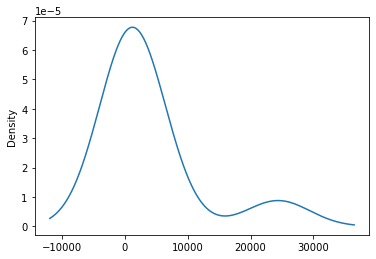

In [17]:
# Binning would be counter-productive
income_counts.plot.density()

In [18]:
# Checking SPECIAL_CONSIDERATIONS.... seems unhelpful, will drop
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [19]:
# Dropping spec_consdierations column
application_df.drop(columns=['SPECIAL_CONSIDERATIONS'], inplace=True)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.to_list()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [21]:
# Encoding our data
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the checkpoint path and filenames
os.makedirs("optomixed_checkpoints/",exist_ok=True)
checkpoint_path = "optomixed_checkpoints/weights.{epoch:02d}.hdf5"

In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 100)               4000      
                                                                 
 dense_55 (Dense)            (None, 50)                5050      
                                                                 
 dense_56 (Dense)            (None, 1)                 51        
                                                                 
Total params: 9,101
Trainable params: 9,101
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [100]:
# Create a callback that saves the model's weights every 5 epochs
batch_size=804
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*batch_size)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 984us/step - loss: 0.5676 - accuracy: 0.7228
Epoch 2/50
804/804 [==============================] - 1s 957us/step - loss: 0.5546 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7323
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7319
Epoch 5/50
789/804 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.7320
Epoch 5: saving model to optomixed_checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 982us/step - loss: 0.5488 - accuracy: 0.7315
Epoch 6/50
804/804 [==============================] - 1s 956us/step - loss: 0.5480 - accuracy: 0.7330
Epoch 7/50
804/804 [==============================] - 1s 998us/step - loss: 0.5469 - accuracy: 0.7321
Epoch 8/50
804/804 [==============================] - 1s 964us/step - loss: 0.5464 - accuracy: 0.7327
Epoch 9/50
804/804 [====================

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Saving model weights to .h5 file
nn.save('AlphabetSoupCharity_optomized.h5')